In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset into the notebook

In [46]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [47]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Because there are mising entriesin the total_bedrooms category (20433 instead of 20640), we want to drop the data.

In [49]:
data.dropna(inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [51]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [52]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [53]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

Split the data in the variables further into training and testing data. .2 -> 20% reserved for testing

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [55]:
train_data = x_train.join(y_train)

In [56]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4646,-118.31,34.06,34.0,1848.0,667.0,1351.0,589.0,2.0547,<1H OCEAN,410000.0
2235,-119.79,36.84,22.0,1529.0,375.0,1543.0,395.0,1.7926,INLAND,51700.0
2318,-119.70,36.83,23.0,3532.0,756.0,1885.0,758.0,2.5904,INLAND,71400.0
18801,-121.83,40.69,14.0,821.0,170.0,477.0,129.0,3.1500,INLAND,87500.0
20195,-119.20,34.27,8.0,4942.0,1173.0,3012.0,1033.0,3.4450,NEAR OCEAN,203400.0
...,...,...,...,...,...,...,...,...,...,...
20445,-118.83,34.33,6.0,6679.0,1164.0,3196.0,1157.0,5.4493,<1H OCEAN,242600.0
13777,-117.08,34.02,20.0,3111.0,563.0,1453.0,538.0,3.3365,INLAND,122800.0
824,-122.08,37.63,34.0,1619.0,293.0,1148.0,310.0,4.0326,NEAR BAY,164700.0
2590,-124.09,40.88,31.0,1982.0,495.0,1052.0,467.0,1.5326,NEAR OCEAN,74100.0


Let's take a look at some visual representations of our data:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

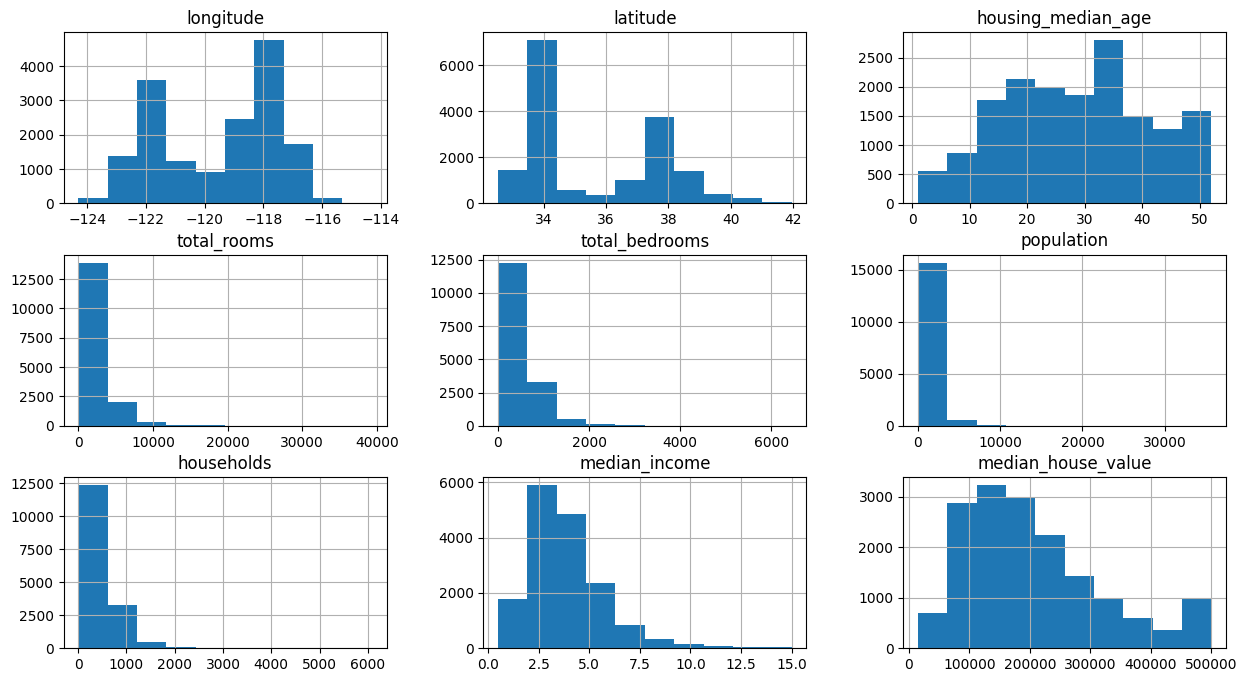

In [57]:
train_data.hist(figsize=(15, 8))

In [66]:
train_data.corr()

ValueError: could not convert string to float: '<1H OCEAN'

Because ocean_proximity is categorical, we need to reinterpret the data before finding correlations

In [67]:
train_data.ocean_proximity

4646      <1H OCEAN
2235         INLAND
2318         INLAND
18801        INLAND
20195    NEAR OCEAN
            ...    
20445     <1H OCEAN
13777        INLAND
824        NEAR BAY
2590     NEAR OCEAN
9958         INLAND
Name: ocean_proximity, Length: 16346, dtype: object

In [68]:
pd.get_dummies(train_data.ocean_proximity, dtype=int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4646,1,0,0,0,0
2235,0,1,0,0,0
2318,0,1,0,0,0
18801,0,1,0,0,0
20195,0,0,0,0,1
...,...,...,...,...,...
20445,1,0,0,0,0
13777,0,1,0,0,0
824,0,0,0,1,0
2590,0,0,0,0,1


In [76]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

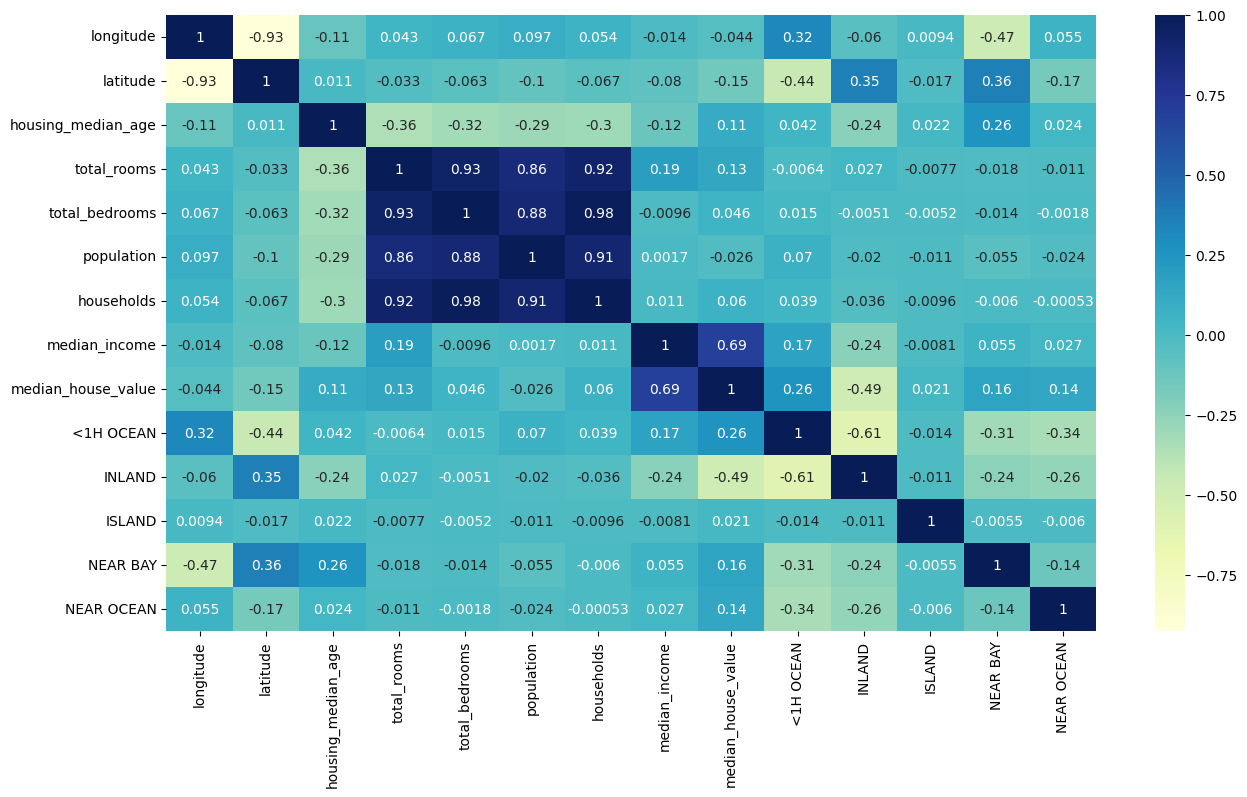

In [77]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

We're trying to predict house values, so we should look at variables that correlate **strongly** with median house value (positive and negative)

<Axes: xlabel='latitude', ylabel='longitude'>

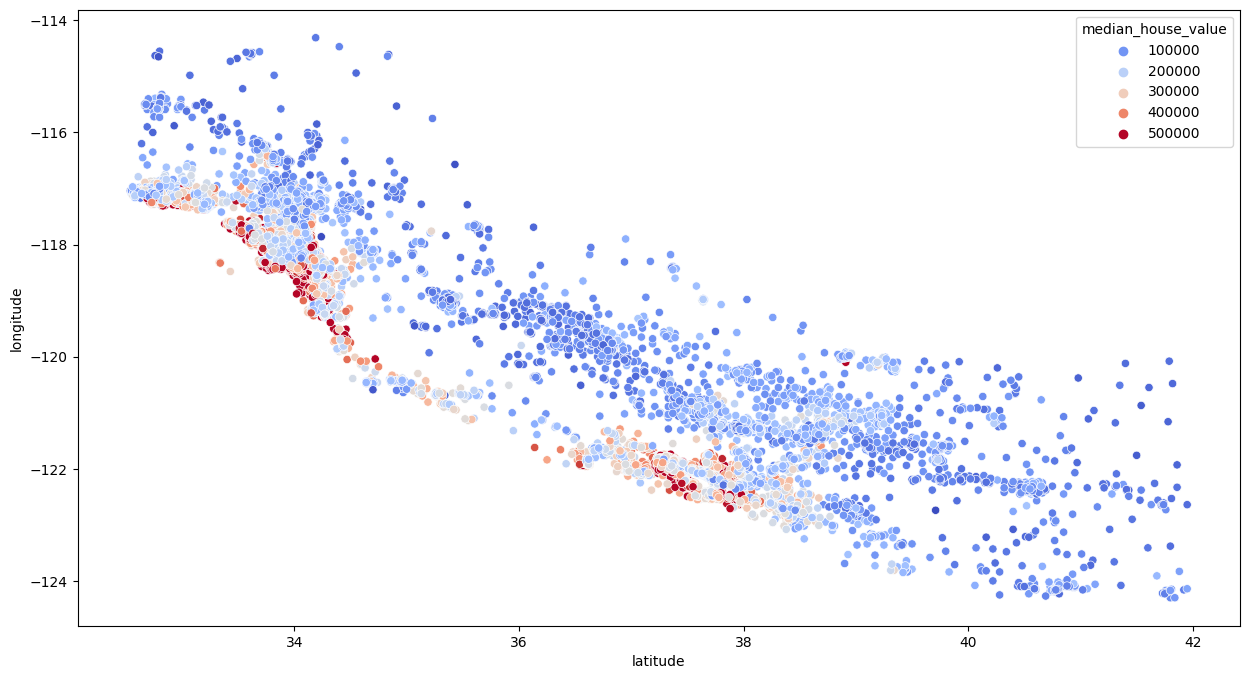

In [80]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: xlabel='median_income', ylabel='median_house_value'>

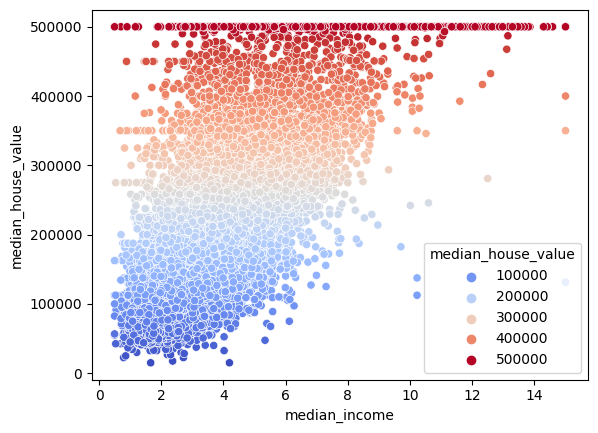

In [88]:
sns.scatterplot(x='median_income', y='median_house_value', data=train_data, hue='median_house_value', palette='coolwarm')

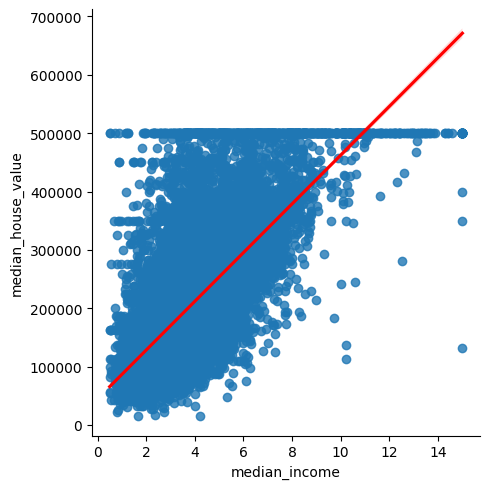

In [89]:
sns.lmplot(x='median_income', y='median_house_value', data=train_data, line_kws={'color': 'red'})

In [91]:
np.round(np.corrcoef(train_data['median_income'], train_data['median_house_value'])[0, 1], 2)

0.69

In [103]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(train_data['median_income'], train_data['median_house_value'])

print('slope: '+ str(slope) + " intercept: "+ str(intercept))


slope: 41770.05312484902 intercept: 44775.45567544442


In [118]:
test_data = x_test.join(y_test)

x_test['median_income']

18924    4.4397
19755    2.1898
17994    4.6312
14722    4.3281
1632     6.9170
          ...  
19613    5.2452
15024    4.0549
4823     2.3536
5909     3.6726
20416    6.7612
Name: median_income, Length: 4087, dtype: float64

In [119]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18924,-122.17,38.06,16.0,3515.0,626.0,1764.0,626.0,4.4397,NEAR BAY
19755,-122.21,40.18,30.0,744.0,156.0,410.0,165.0,2.1898,INLAND
17994,-121.98,37.30,30.0,3404.0,693.0,1794.0,633.0,4.6312,<1H OCEAN
14722,-117.03,32.80,19.0,3866.0,775.0,1554.0,703.0,4.3281,<1H OCEAN
1632,-122.17,37.87,38.0,1261.0,177.0,472.0,183.0,6.9170,NEAR BAY
...,...,...,...,...,...,...,...,...,...
19613,-121.14,37.46,4.0,2919.0,503.0,1592.0,491.0,5.2452,INLAND
15024,-117.01,32.76,34.0,3415.0,608.0,1464.0,593.0,4.0549,<1H OCEAN
4823,-118.31,34.05,26.0,1809.0,640.0,2543.0,640.0,2.3536,<1H OCEAN
5909,-118.43,34.29,38.0,1237.0,298.0,1073.0,293.0,3.6726,<1H OCEAN


In [120]:
slope * 4.4397 + intercept

230221.96053383662

In [122]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18924,-122.17,38.06,16.0,3515.0,626.0,1764.0,626.0,4.4397,NEAR BAY,187100.0
19755,-122.21,40.18,30.0,744.0,156.0,410.0,165.0,2.1898,INLAND,63200.0
17994,-121.98,37.30,30.0,3404.0,693.0,1794.0,633.0,4.6312,<1H OCEAN,283200.0
14722,-117.03,32.80,19.0,3866.0,775.0,1554.0,703.0,4.3281,<1H OCEAN,220000.0
1632,-122.17,37.87,38.0,1261.0,177.0,472.0,183.0,6.9170,NEAR BAY,438000.0
...,...,...,...,...,...,...,...,...,...,...
19613,-121.14,37.46,4.0,2919.0,503.0,1592.0,491.0,5.2452,INLAND,161900.0
15024,-117.01,32.76,34.0,3415.0,608.0,1464.0,593.0,4.0549,<1H OCEAN,223700.0
4823,-118.31,34.05,26.0,1809.0,640.0,2543.0,640.0,2.3536,<1H OCEAN,500000.0
5909,-118.43,34.29,38.0,1237.0,298.0,1073.0,293.0,3.6726,<1H OCEAN,154600.0
